In [2]:
# import des modules nécessaires
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.patches as mpatches
from distinctipy import distinctipy
from matplotlib.font_manager import FontProperties
from matplotlib import rc
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import ipywidgets as widgets
from IPython.display import clear_output, display
from scipy.stats import chi2_contingency as chi2_contingency
import statsmodels.formula.api as statsapi
import statsmodels as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import xlrd as xlrd
from matplotlib import font_manager # for mac users
import platform
import os
from sklearn.decomposition import PCA

# Modifier les paramètres d'affichage de la sortie des commandes dans Jupyter
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 100)

# Pour lister les polices présentes
#fpaths = matplotlib.font_manager.findSystemFonts()
#for i in fpaths:
#    f = matplotlib.font_manager.get_font(i)
#    print(f.family_name)
# import de la police Garamond

system = platform.system()
print(system)
if system == 'Darwin':  # macOS
  font_path = '/Library/Fonts/GaramondPremrPro.otf'
elif system == 'Windows':
  font_path = 'C:/Windows/Fonts/Garamond.TTF'
else:  #  unix
  font_path = 'GARA.TTF'
print(font_path)

garamond_font = FontProperties(fname="/Library/Fonts/GaramondPremrPro.otf",size=14) # for MAC
garamond_font = FontProperties(fname="/Library/Fonts/Garamond.otf",size=14) # for WINDOWS

#    timesnewroman_font = FontProperties(fname="C:/Windows/Fonts/TIMES.TTF",size=14)

font_manager.findSystemFonts(fontpaths=font_path, fontext="ttf")
font_manager.findfont("Garamond Premier Pro") 

# Définissez la police par défaut pour toute la figure
matplotlib.rcParams['font.family'] = 'Garamond'

findfont: Font family ['Garamond Premier Pro'] not found. Falling back to DejaVu Sans.


Windows
C:/Windows/Fonts/Garamond.TTF


In [3]:
# Chargement des données PINGOUIN
df_pingouin = pd.read_table("input/mlsupervise/penguins_size.csv",sep=",")

# Ajout titre colonnes
df_pingouin.columns=["species","island","culmen_length_mm","culmen_depth_mm","flipper_length_mm","body_mass_g","sex"]

# Verif données
#print(df_pingouin.head(5))
#print("Shape des données PINGOUIN: ", df_pingouin.shape)

df_pingouin.dropna(inplace=True) # on perd 7 enregistrements seulement

Projet 1. Les pingouins

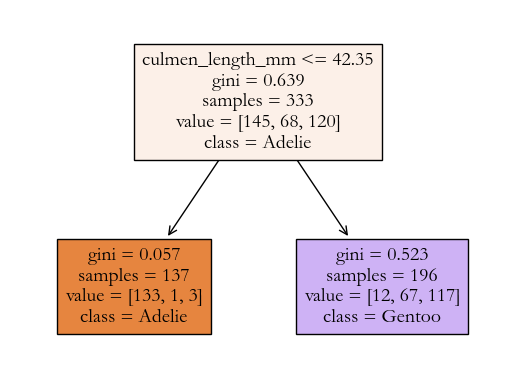

F:  ['culmen_length_mm' 'culmen_depth_mm']
C:  ['Adelie', 'Chinstrap', 'Gentoo']


In [4]:
# Projet 1. Question 1. Arbre de profondeur 1

# import des librairies
import sklearn
from sklearn.tree import plot_tree
#from sklearn.tree import tree
from sklearn.tree import DecisionTreeClassifier

# Définition des tableaux de données X et Y
X = df_pingouin[["culmen_length_mm","culmen_depth_mm"]]
Y = df_pingouin["species"] # Target names
#print(len(X))
#print(len(Y))
# Rename pour être plus parlant
features_values=X.loc[1:,:].values
features_names=X.columns.values
target_names = Y.loc[1:].values
#print(len(features_values))
#print(target_names)
# Entrainement d'un arbre de profondeur 1
clf = DecisionTreeClassifier(criterion="gini",splitter="best",max_depth=1)
clf = clf.fit(features_values,target_names)
class_names=["Adelie","Chinstrap","Gentoo"]
# Affichage de l'Arbre
fig = plt.figure()
plot_tree(clf,filled=True, feature_names=features_names,class_names=class_names)
#plt.title("Arbre de profondeur 1 sur les données Pingouin")
plt.show()

print("F: ",features_names)
print("C: ", class_names)

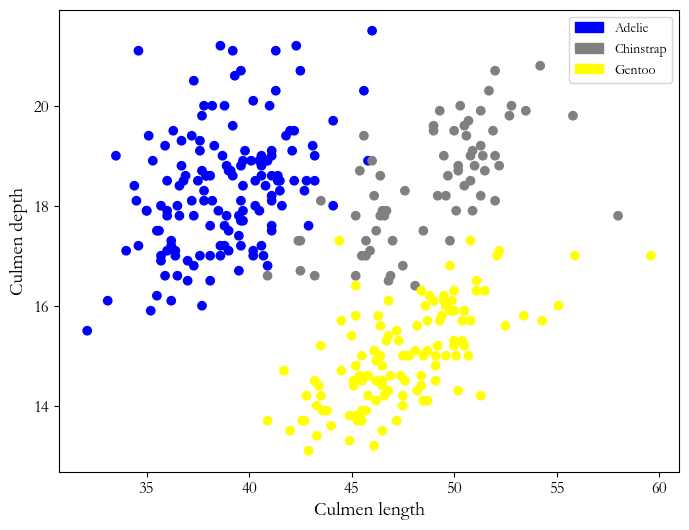

In [5]:
# # Projet 1. Question 2. Scatterplot avec couleur en fonction de l'espece

# Affichage des données avec 2 composantes principales, données brutes
labels = ["Adelie","Chinstrap","Gentoo"]
(fig, ax) = plt.subplots(figsize=(8, 6)) # ax = fig.add_subplot()
colors={"Adelie":"blue","Chinstrap":"grey","Gentoo":"yellow"}
sctt=ax.scatter(x=X["culmen_length_mm"],y=X["culmen_depth_mm"], c=Y.map(colors))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Culmen length", fontsize=14)
plt.ylabel("Culmen depth", fontsize=14)

# Créez une légende avec des labels spécifiques aux catégories d'iris
blue_patch = mpatches.Patch(color='blue', label='Adelie')
grey_patch = mpatches.Patch(color='grey', label='Chinstrap')
yellow_patch = mpatches.Patch(color='yellow', label='Gentoo')
ax.legend(handles=[blue_patch,grey_patch,yellow_patch])

# Afficher
plt.show()

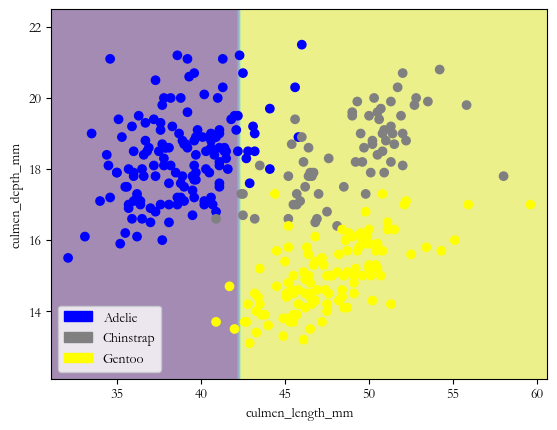

In [6]:
# Projet 1. Question 3. Scatterplot avec la partition de l'arbre

# import des librairies
from sklearn.inspection import DecisionBoundaryDisplay

# Plot the decision boundary
disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    features_values,
    response_method="predict",
    xlabel=features_names[0],
    ylabel=features_names[1],
    alpha=0.5
)
labels = ["Adelie","Chinstrap","Gentoo"]
#(fig, ax) = plt.subplots(figsize=(8, 6)) # ax = fig.add_subplot()
colors={"Adelie":"blue","Chinstrap":"grey","Gentoo":"yellow"}
sctt=disp.ax_.scatter(x=X["culmen_length_mm"],y=X["culmen_depth_mm"], c=Y.map(colors))

# Créez une légende avec des labels spécifiques aux catégories d'iris
blue_patch = mpatches.Patch(color='blue', label='Adelie')
grey_patch = mpatches.Patch(color='grey', label='Chinstrap')
yellow_patch = mpatches.Patch(color='yellow', label='Gentoo')
disp.ax_.legend(handles=[blue_patch,grey_patch,yellow_patch])


[Text(0.5, 0.75, 'culmen_length_mm <= 42.35\ngini = 0.639\nsamples = 333\nvalue = [145, 68, 120]\nclass = Adelie'),
 Text(0.25, 0.25, 'gini = 0.057\nsamples = 137\nvalue = [133, 1, 3]\nclass = Adelie'),
 Text(0.75, 0.25, 'gini = 0.523\nsamples = 196\nvalue = [12, 67, 117]\nclass = Gentoo')]

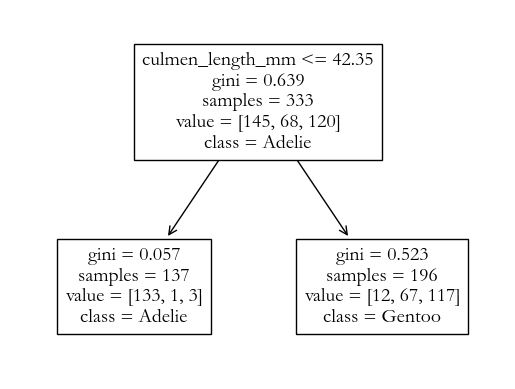

In [7]:
# Utilisation de plot.tree de sklearn.Tree pour un arbre de profondeur 1
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

#print(type(features_names))
clf = tree.DecisionTreeClassifier(random_state=0,max_depth=1)
clf=clf.fit(features_values,target_names)
tree.plot_tree(clf,feature_names=features_names,class_names=["Adelie","Chinstrap","Gentoo"])
#print(target_names)

<BarContainer object of 3 artists>

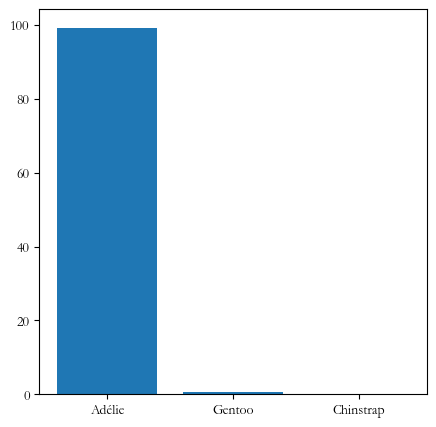

In [38]:
# Prediction de classification avec de nouvelles valeurs
array_proba_prof_1 = clf.predict_proba([[35., 17.]])
array_proba_prof_1 = 100*array_proba_prof_1
array_proba_prof_1_T = array_proba_prof_1.T

# Barplot avec les 3 espèces de pingouins
names = ["Adélie","Gentoo","Chinstrap"]
(fig, ax) = plt.subplots(figsize=(5, 5))

plt.xticks(range(len(array_proba_prof_1_T)), names)
plt.bar( range(len(array_proba_prof_1_T)), array_proba_prof_1_T[:, 0])




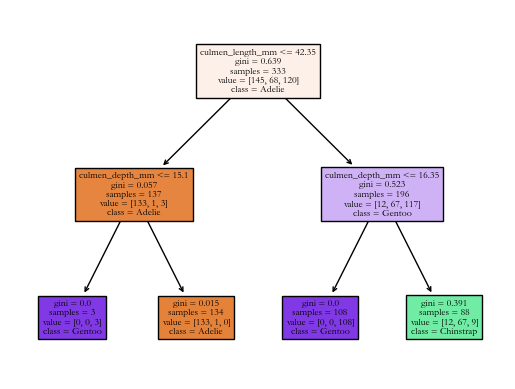

In [33]:
# Entrainement d'un arbre de profondeur 2
clf2 = DecisionTreeClassifier(criterion="gini",splitter="best",max_depth=2)
clf2 = clf2.fit(features_values,target_names)

# Affichage de l'Arbre
fig = plt.figure()
plot_tree(clf2,filled=True, feature_names=features_names,class_names=["Adelie","Chinstrap","Gentoo"])
#plt.title("Arbre de profondeur 2 sur les données Pingouin")
plt.show()

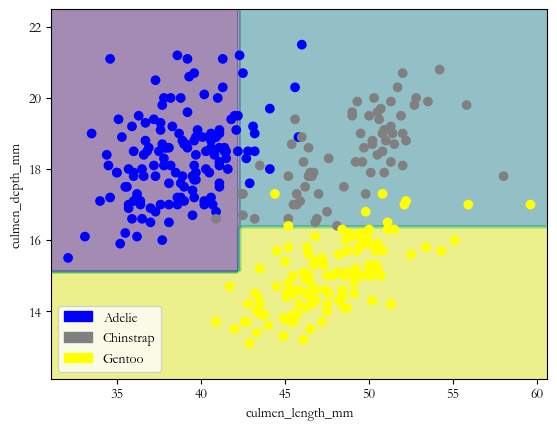

In [34]:
# Projet 1. Question 6. Scatterplot avec la partition de l'arbre

# import des librairies
from sklearn.inspection import DecisionBoundaryDisplay

# Plot the decision boundary
disp = DecisionBoundaryDisplay.from_estimator(
    clf2,
    features_values,
    response_method="predict",
    xlabel=features_names[0],
    ylabel=features_names[1],
    alpha=0.5
)
labels = ["Adelie","Chinstrap","Gentoo"]
colors={"Adelie":"blue","Chinstrap":"grey","Gentoo":"yellow"}
sctt=disp.ax_.scatter(x=X["culmen_length_mm"],y=X["culmen_depth_mm"], c=Y.map(colors))

# Créez une légende avec des labels spécifiques aux catégories d'iris
blue_patch = mpatches.Patch(color='blue', label='Adelie')
grey_patch = mpatches.Patch(color='grey', label='Chinstrap')
yellow_patch = mpatches.Patch(color='yellow', label='Gentoo')
disp.ax_.legend(handles=[blue_patch,grey_patch,yellow_patch])

[Text(0.5, 0.8333333333333334, 'culmen_length_mm <= 42.35\ngini = 0.639\nsamples = 333\nvalue = [145, 68, 120]\nclass = Adelie'),
 Text(0.25, 0.5, 'culmen_depth_mm <= 15.1\ngini = 0.057\nsamples = 137\nvalue = [133, 1, 3]\nclass = Adelie'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = Gentoo'),
 Text(0.375, 0.16666666666666666, 'gini = 0.015\nsamples = 134\nvalue = [133, 1, 0]\nclass = Adelie'),
 Text(0.75, 0.5, 'culmen_depth_mm <= 16.35\ngini = 0.523\nsamples = 196\nvalue = [12, 67, 117]\nclass = Gentoo'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 108\nvalue = [0, 0, 108]\nclass = Gentoo'),
 Text(0.875, 0.16666666666666666, 'gini = 0.391\nsamples = 88\nvalue = [12, 67, 9]\nclass = Chinstrap')]

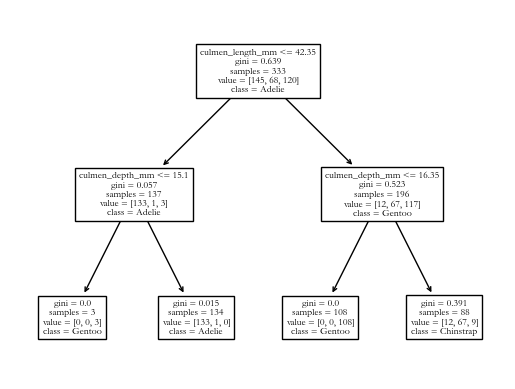

In [35]:
# Utilisation de plot.tree de sklearn.Tree pour un arbre de profondeur 2
from sklearn import tree
#print(type(features_names))
clf2 = tree.DecisionTreeClassifier(random_state=0,max_depth=2)
clf2=clf2.fit(features_values,target_names)
tree.plot_tree(clf2,feature_names=features_names,class_names=["Adelie","Chinstrap","Gentoo"])


<BarContainer object of 3 artists>

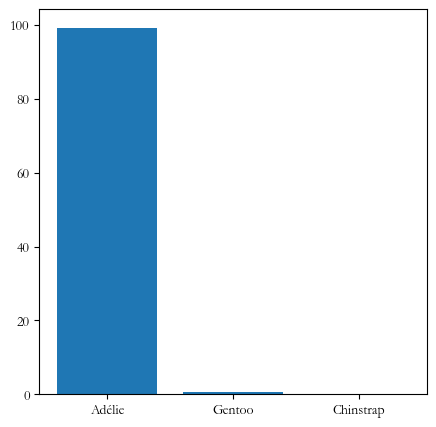

In [41]:
# Prediction de classification avec de nouvelles valeurs
array_proba_prof_2 = clf2.predict_proba([[35., 17.]])
array_proba_prof_2 = 100*array_proba_prof_2
array_proba_prof_2_T = array_proba_prof_2.T

# Barplot avec les 3 espèces de pingouins
names = ["Adélie","Gentoo","Chinstrap"]
(fig, ax) = plt.subplots(figsize=(5, 5))

plt.xticks(range(len(array_proba_prof_2_T)), names)
plt.bar( range(len(array_proba_prof_2_T)), array_proba_prof_2_T[:, 0])